In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import scipy.stats as st

pd.options.mode.chained_assignment = None

def fix_names(df):
    return df.rename(columns={
        " comsumption": "consumption", 
        " distance": "distance",
        " volume": "volume",
        " seed": "seed"
    })


<h2>Confidence interval for each test</h2>

In [67]:
tests = [
    "baseline",
    "75volume",
    "50volume",
    "25volume",
    "75frequency",
    "50frequency",
    "25frequency",
    "75vol75freq",
    "50vol50freq",
    "25vol25freq",
]

sample_stats = {
    "baseline": {},
    "75volume": {},
    "50volume": {},
    "25volume": {},
    "75frequency": {},
    "50frequency": {},
    "25frequency": {},
    "75vol75freq": {},
    "50vol50freq": {},
    "25vol25freq": {},
}

for test in tests:
    dir = "sim-data/"+test+"/"

    Y_consumption = []
    Y_distance = []
    Y_lowcon = []


    # Calc stats for each run
    for i in range(1, 6):
        df = fix_names(pd.read_csv(dir+str(i)+".csv"))

        consumptions = df["consumption"].values
        distances = df["distance"].values
        distances = distances[distances > 0] # Removing no travel
        lowcon = len(consumptions[consumptions < 0.17 - (3 * 0.04)]) # If consumption is 3 sd's away from mean

        Y_consumption.append(np.mean(consumptions))
        Y_distance.append(np.mean(distances))
        Y_lowcon.append(lowcon)

    Y_consumption = np.array(Y_consumption)
    Y_distance = np.array(Y_distance)
    Y_lowcon = np.array(Y_lowcon)

    # Calc stats across runs
    consumption_ci = st.t.interval(confidence=0.90, df=len(Y_consumption)-1, 
                                    loc=np.mean(Y_consumption), 
                                    scale=st.sem(Y_consumption))

    distance_ci = st.t.interval(confidence=0.90, 
                                df=len(Y_distance)-1, 
                                loc=np.mean(Y_distance), 
                                scale=st.sem(Y_distance))
    
    lowcon_ci = st.t.interval(confidence=0.90, 
                                df=len(Y_lowcon)-1, 
                                loc=np.mean(Y_lowcon), 
                                scale=st.sem(Y_lowcon))
    
    sample_stats[test]["consumption"] = consumption_ci
    sample_stats[test]["distance"] = distance_ci
    sample_stats[test]["lowcon"] = lowcon_ci

print(sample_stats)
        

{'baseline': {'consumption': (0.16926561456643746, 0.16943622509716838), 'distance': (7.318360555191143, 7.531445332266088), 'lowcon': (1103.330200625652, 1349.469799374348)}, '75volume': {'consumption': (0.1652546360194527, 0.16739529273031947), 'distance': (7.799609126788815, 8.290002637443337), 'lowcon': (4172.483987247117, 7211.916012752883)}, '50volume': {'consumption': (0.14111189366252652, 0.15238855842560284), 'distance': (8.494956197607495, 8.872934075669539), 'lowcon': (25866.601347677875, 42318.99865232212)}, '25volume': {'consumption': (0.07854482426894407, 0.08549710209997596), 'distance': (8.806751153086465, 8.881840500984394), 'lowcon': (123783.02377396246, 133725.37622603754)}, '75frequency': {'consumption': (0.16387634064138273, 0.1675687196253416), 'distance': (7.780869299860056, 8.068092581116481), 'lowcon': (3839.139149941036, 9270.860850058962)}, '50frequency': {'consumption': (0.13739915692915305, 0.14743099548303318), 'distance': (8.346359706787535, 8.63106169041

<h2>Varying volume plots</h2>

In [83]:
def plot_confidence_interval(x, interval, color='#2187bb', horizontal_line_width=0.25):
    left = x - horizontal_line_width / 2
    top = interval[0] - interval[1]
    right = x + horizontal_line_width / 2
    bottom = interval[0] + interval[1]
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, interval[0], 'o', color='#f44336')

stat_names = ["consumption", "distance", "lowcon"]
titles = ["Consumption", "Distance", "Low Consumption"]
units = ["(kg)", "(km)", "(count)"]

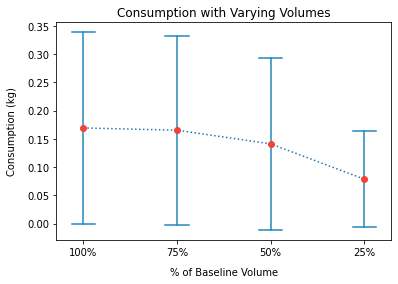

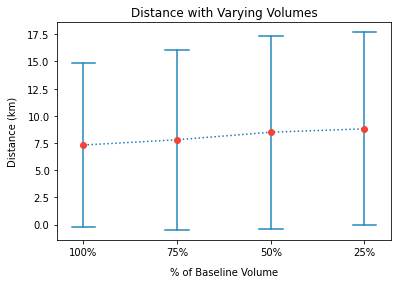

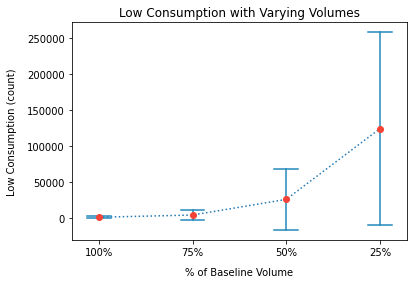

In [84]:

for stat, title, unit in zip(stat_names, titles, units):
    plt.xticks([1, 2, 3, 4], ['100%', '75%', '50%', '25%'])
    plt.title(title + " with Varying Volumes")

    line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75volume"][stat][0],
        sample_stats["50volume"][stat][0],
        sample_stats["25volume"][stat][0],
    ]
    plt.plot([1, 2, 3, 4], line, linestyle = 'dotted')

    plot_confidence_interval(1, sample_stats["baseline"][stat])
    plot_confidence_interval(2, sample_stats["75volume"][stat])
    plot_confidence_interval(3, sample_stats["50volume"][stat])
    plot_confidence_interval(4, sample_stats["25volume"][stat])

    plt.xlabel("% of Baseline Volume", labelpad=10)
    plt.ylabel(title + " " + unit, labelpad=10)

    plt.show()

<h2>Varying frequency plots</h2>

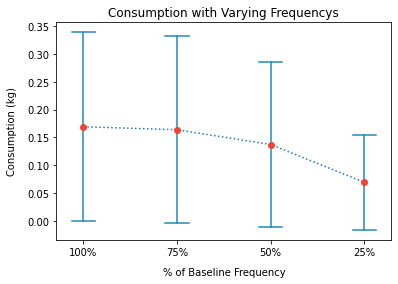

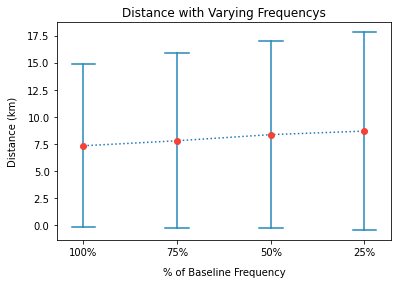

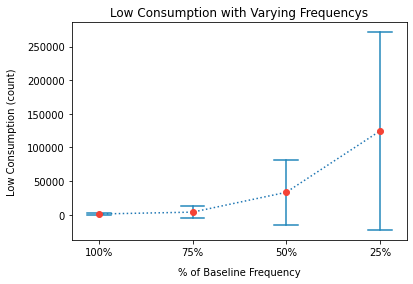

In [85]:
for stat, title, unit in zip(stat_names, titles, units):
    plt.xticks([1, 2, 3, 4], ['100%', '75%', '50%', '25%'])
    plt.title(title + " with Varying Frequencys")

    line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75frequency"][stat][0],
        sample_stats["50frequency"][stat][0],
        sample_stats["25frequency"][stat][0],
    ]
    plt.plot([1, 2, 3, 4], line, linestyle = 'dotted')

    plot_confidence_interval(1, sample_stats["baseline"][stat])
    plot_confidence_interval(2, sample_stats["75frequency"][stat])
    plot_confidence_interval(3, sample_stats["50frequency"][stat])
    plot_confidence_interval(4, sample_stats["25frequency"][stat])

    plt.xlabel("% of Baseline Frequency", labelpad=10)
    plt.ylabel(title + " " + unit, labelpad=10)

    plt.show()

<h2>Varying volume and frequency plots</h2>

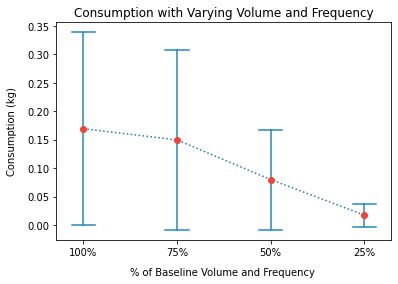

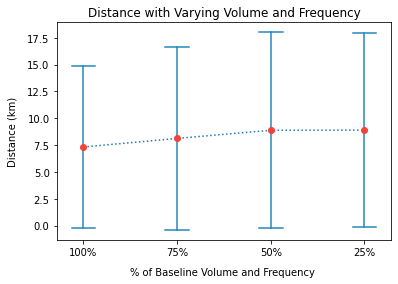

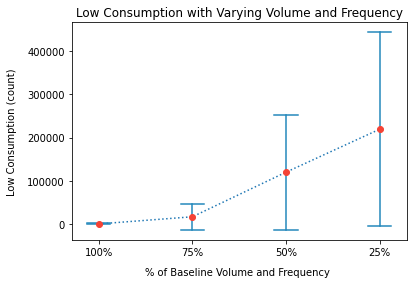

In [86]:
for stat, title, unit in zip(stat_names, titles, units):
    plt.xticks([1, 2, 3, 4], ['100%', '75%', '50%', '25%'])
    plt.title(title + " with Varying Volume and Frequency")

    line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75vol75freq"][stat][0],
        sample_stats["50vol50freq"][stat][0],
        sample_stats["25vol25freq"][stat][0],
    ]
    plt.plot([1, 2, 3, 4], line, linestyle = 'dotted')

    plot_confidence_interval(1, sample_stats["baseline"][stat])
    plot_confidence_interval(2, sample_stats["75vol75freq"][stat])
    plot_confidence_interval(3, sample_stats["50vol50freq"][stat])
    plot_confidence_interval(4, sample_stats["25vol25freq"][stat])

    plt.xlabel("% of Baseline Volume and Frequency ", labelpad=10)
    plt.ylabel(title + " " + unit, labelpad=10)

    plt.show()

<h2>Comparing scenarios<h2>

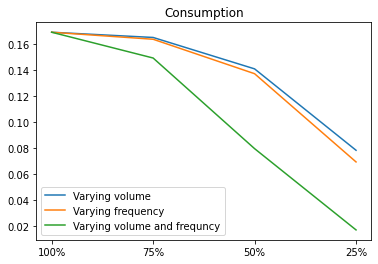

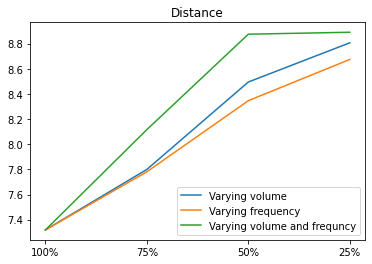

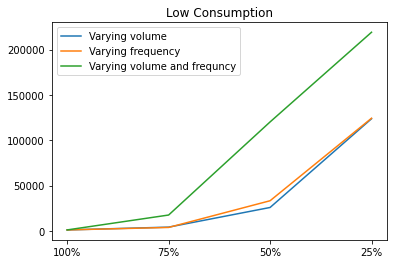

In [92]:
for stat, title, unit in zip(stat_names, titles, units):
    plt.xticks([1, 2, 3, 4], ['100%', '75%', '50%', '25%'])
    plt.title(title)

    vol_line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75volume"][stat][0],
        sample_stats["50volume"][stat][0],
        sample_stats["25volume"][stat][0],
    ]

    freq_line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75frequency"][stat][0],
        sample_stats["50frequency"][stat][0],
        sample_stats["25frequency"][stat][0],
    ]

    volfreq_line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75vol75freq"][stat][0],
        sample_stats["50vol50freq"][stat][0],
        sample_stats["25vol25freq"][stat][0],
    ]

    plt.plot([1, 2, 3, 4], vol_line, label="Varying volume")
    plt.plot([1, 2, 3, 4], freq_line, label="Varying frequency")
    plt.plot([1, 2, 3, 4], volfreq_line, label="Varying volume and frequncy")
    plt.legend()

    plt.show()